In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as misc
from skimage.transform import resize as imresize
from src.autoencoder import ResidualAutoEncoder
from src.tools import imread, imbatch1
from src.style import _tv_loss

from src import karai


In [2]:
coco_path = '/home/diogo/data/deep_studies/style_transfer/fast-style-transfer/data/train2014/'
image_paths = [coco_path + name for name in os.listdir(coco_path)]

In [3]:
def plot_img_cmp(X, Xt, nimages=3):
    imgidxs = np.random.choice(X.shape[0], nimages)

    fig, axeslist = plt.subplots(ncols=nimages, nrows=2, sharex=True, sharey=True)
    fig.set_size_inches(16, 8)

    for i in range(nimages):
        axeslist[0, i].imshow(X[imgidxs[i]])
        axeslist[0, i].set_axis_off()
        
        axeslist[1, i].imshow(Xt[imgidxs[i]])
        axeslist[1, i].set_axis_off()


In [4]:
tf.reset_default_graph()


tf_input_layer = tf.layers.Input(shape=(244, 244, 3), dtype=tf.float32)

output = karai.net(tf_input_layer)

#autoencoder = ResidualAutoEncoder(tf_input_layer)
 

with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.square(tf_input_layer - output)) # 0.001 * _tv_loss(autoencoder.output)#/tf.size(tf_input_layer)
    tf.summary.scalar('loss', loss)

#train = tf.train.GradientDescentOptimizer(0.001).minimize(loss)
train = tf.train.AdamOptimizer(0.001).minimize(loss)

# Merge all the summaries and write them out to /tmp/mnist_logs (by default)
merged = tf.summary.merge_all()


sess = tf.Session()
init = tf.global_variables_initializer()
writer = tf.summary.FileWriter('./output/autoencoder', sess.graph)
sess.run(init)
ll = []

#builder = tf.saved_model.builder.SavedModelBuilder("./output/autoencoder")

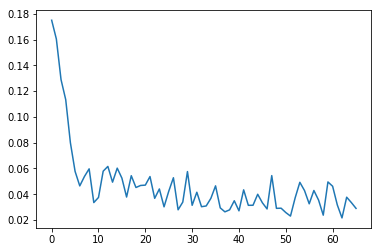

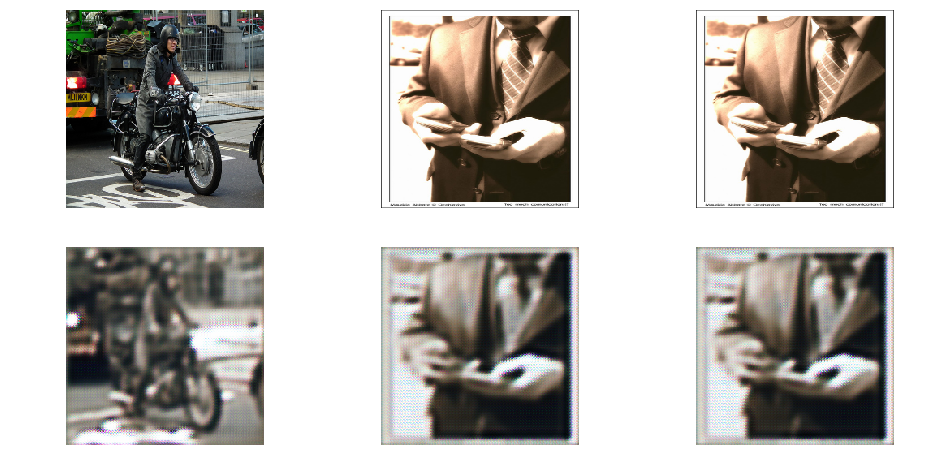

In [7]:
%matplotlib inline
from IPython.display import display, clear_output

with sess.as_default():
    for i in range(50):
        npimages = np.asarray([imread(x, H=244) for x in np.random.choice(image_paths, 5)], dtype=np.float32)
        food = {tf_input_layer: npimages}
        
        l, _ = sess.run([loss, train], feed_dict=food)
        
        summary = sess.run(merged, feed_dict=food)
        writer.add_summary(summary, i)

        ll.append(l)
        if i % 2 == 0 and i > 0:
            imgt = sess.run(output, feed_dict=food)
            
            plt.plot(np.arange(len(ll)), ll)
            plt.show()
            plot_img_cmp(npimages, imgt, 3)
            plt.show()
            clear_output(wait=True)
    
    #builder.add_meta_graph_and_variables(sess, tags=['NADA'])
    #builder.save()


In [ ]:
print(imgt.min(), imgt.max())